In [16]:
# Program to perform Sentiment Analysis on Twitter dataset to classify the tweets into depressed and not depressed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#importing the dataset
tweets = pd.read_csv("sentiment_tweets3.csv")
tweets.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
Unnamed: 0    10314 non-null int64
message       10314 non-null object
label         10314 non-null int64
dtypes: int64(2), object(1)
memory usage: 241.8+ KB


In [19]:
#dropping the unnamed column
#axis 0 = rows axis 1 = column
tweets= tweets.drop("Unnamed: 0",axis=1)

In [20]:
tweets.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [21]:
#get the total counts of the labels
tweets["label"].value_counts()

0    8000
1    2314
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset class distribution')

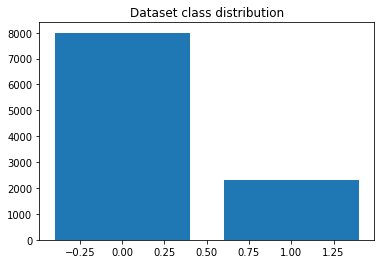

In [22]:
#visually seeing the distribution of data in different classes
%matplotlib inline

from collections import Counter
target_cnt = Counter(tweets.label)

plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset class distribution")

In [23]:
# implementing TF_IDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

#fit and transfor,Learn the vocabulary dictionary and return term-document matrix.
X = vectorizer.fit_transform(tweets.message)
#print(vectorizer.get_feature_names())


In [24]:
X.shape[1]
X.shape[0]

10314

In [25]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
y = tweets.label
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [26]:
# getting the percentage of testing data
(X_train.shape)
print((X_test.shape[0])/((X_train.shape[0])+(X_test.shape[0]))*100)

20.001939111886756


In [27]:
# getting the percentage of testing data

print((X_train.shape[0])/((X_train.shape[0])+(X_test.shape[0]))*100)

79.99806088811324


In [28]:
#implementing the Decision Tree classifier

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
#testing accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy of the model is: {round(accuracy_score(y_predict, y_test), 3) * 100}%")  

Accuracy of the model is: 99.7%


In [30]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['not depressed', 'depressed']

print("Classification report:")
print(classification_report(y_test, y_predict, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

Classification report:
               precision    recall  f1-score   support

not depressed       1.00      1.00      1.00      1614
    depressed       1.00      0.98      0.99       449

    micro avg       1.00      1.00      1.00      2063
    macro avg       1.00      0.99      0.99      2063
 weighted avg       1.00      1.00      1.00      2063

Confusion Matrix:
[[1614    0]
 [   7  442]]


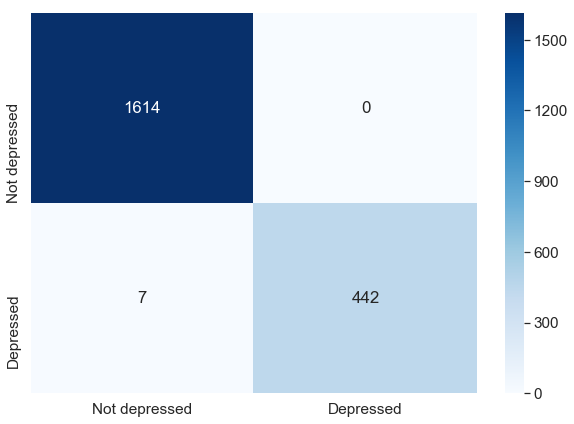

In [31]:
#plotting the confusion matrix
import seaborn as sns

# Create labels 
labels = ["Not depressed" if label == 0 else "Depressed" for label in tweets.label.unique()]

sns.set(font_scale=1.4) # for font size 
df_cm = pd.DataFrame(cm, index = [i for i in labels], 
                    columns = [i for i in labels])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')

In [91]:
#testing the model
#create a function to classify the tweets using the created ML model
def classify(text):
    #only taking transform
    text_vector = vectorizer.transform([text])
    y_predict = clf.predict(text_vector)
    if (y_predict==0):
        print("Not depressed")
    else:
        print("Depressed")


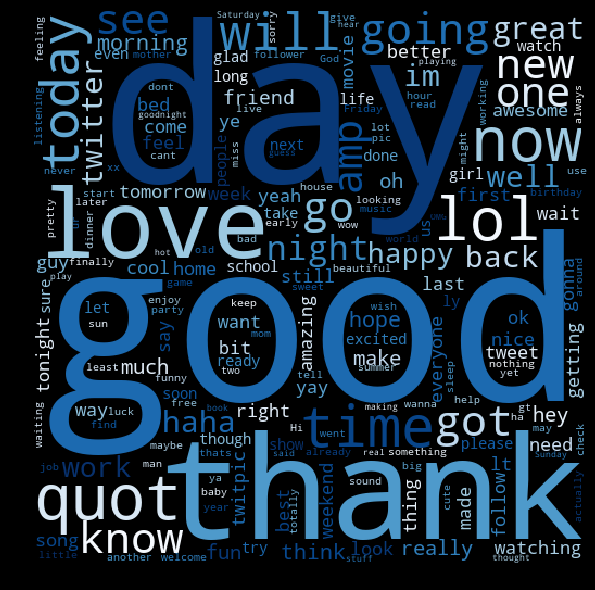

In [14]:
#creating word cloud for Not depressed tweets
from wordcloud import WordCloud
from nltk.corpus import stopwords
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

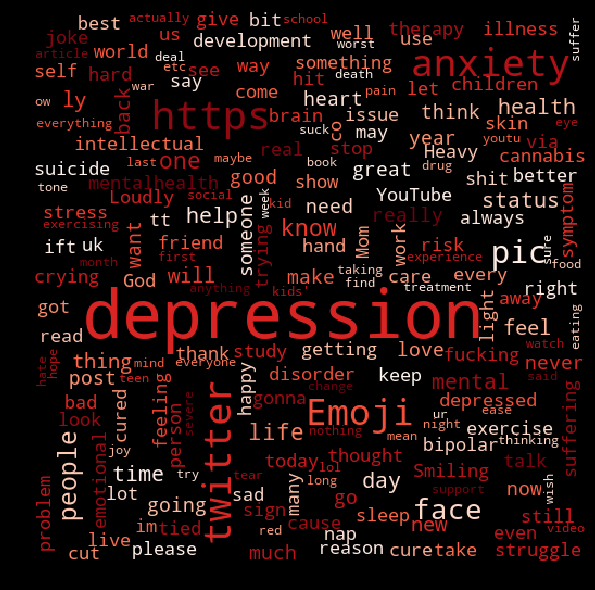

In [15]:
#creating word cloud for Depressed tweets
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Reds").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [94]:
#testing the model with new tweets
tweet = "i feel full of hope and happiness"
classify(tweet)

Not depressed


In [95]:
tweet = 'I feel good today. I have a lot of hope'
classify(tweet)

Not depressed


In [96]:
tweet = "I have depressed. I don't wanna talk to anyone. Don't want to step out. I want to be left alone" 
classify(tweet)

Not depressed


In [97]:
tweet = "I have anxiety issues and I don't feel good. "
classify(tweet)

Depressed
